### Import required libraries for data manipulation, visualization, and building machine learning models

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#### Loading the insurance dataset to analyze factors affecting insurance charges

In [2]:
df=pd.read_csv("C:/Users/DELL/Downloads/insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   str    
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   str    
 5   region    1338 non-null   str    
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 94.5 KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Checking for missing values to ensure data quality before preprocessing

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

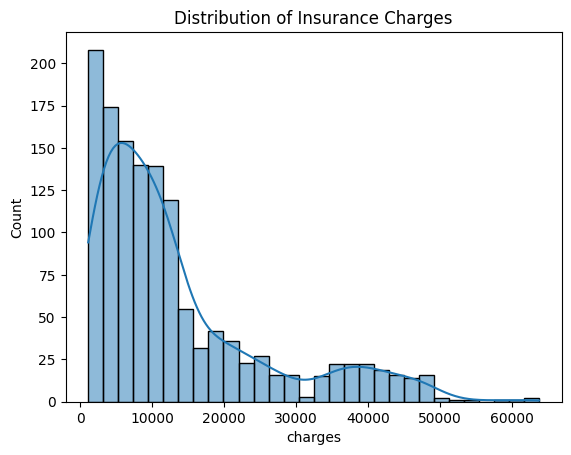

In [89]:
sns.histplot(df['charges'],kde=True)
plt.title("Distribution of Insurance Charges")
plt.show()

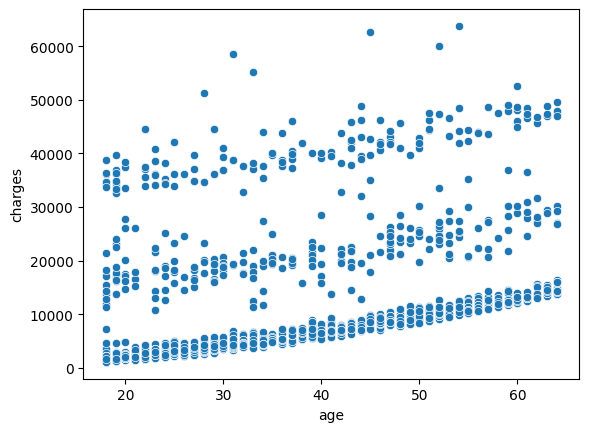

In [11]:
sns.scatterplot(x='age',y='charges',data=df)
plt.show()

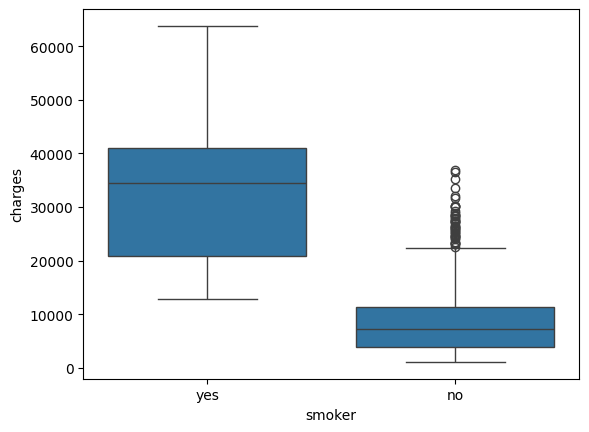

In [13]:
sns.boxplot(x='smoker',y='charges',data=df)
plt.show()

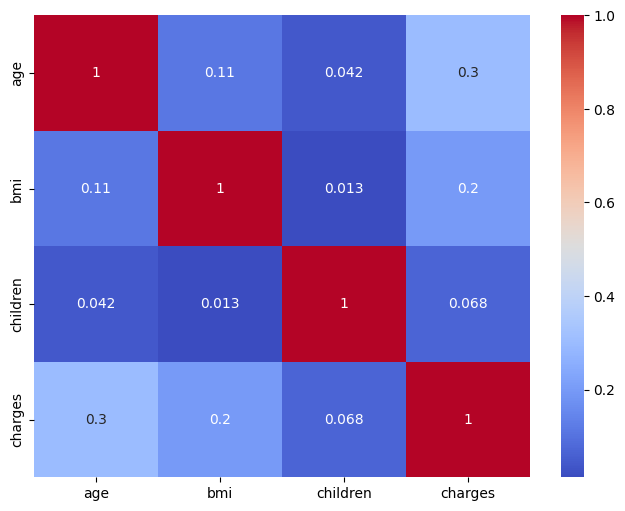

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.show()

#### Converting categorical variables into numerical format so that machine learning models can process them

In [15]:
df_encoded=pd.get_dummies(df,drop_first=True)
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [17]:
x=df_encoded.drop('charges',axis=1)
Y=df_encoded['charges']

#### Separating independent variables (features) and dependent variable (target)

#### Spliting data into training and testing sets to evaluate model performance on unseen data

In [22]:
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.2,random_state=42)

#### Applying feature scaling to bring all features to the same scale
#### This is important for Ridge and Lasso regression

In [24]:
scaler=StandardScaler()

In [25]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

## Linear Regression

In [27]:
lr=LinearRegression()

In [28]:
lr.fit(x_train_scaled,Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [29]:
y_predict=lr.predict(x_test_scaled)

#### Evaluating model performance using MAE, MSE, RMSE and R-squared score

In [31]:
mae=mean_absolute_error(Y_test,y_predict)
mse=mean_squared_error(Y_test,y_predict)
rmse=np.sqrt(mse)
r2=r2_score(Y_test,y_predict)

print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)
print("R2 Accuracy Score:",r2)

Mean Absolute Error: 4181.194473753652
Mean Squared Error: 33596915.85136148
Root Mean Squared Error: 5796.284659276275
R2 Accuracy Score: 0.7835929767120722


In [32]:
coeff_df=pd.DataFrame(lr.coef_,x.columns,columns=['Coefficient'])
coeff_df.sort_values(by='Coefficient',ascending=False)

,Coefficient
smoker_yes,9558.481409
age,3614.975415
bmi,2036.228123
children,516.890247
sex_male,-9.293101
region_northwest,-158.140981
region_southeast,-290.157047
region_southwest,-349.110678


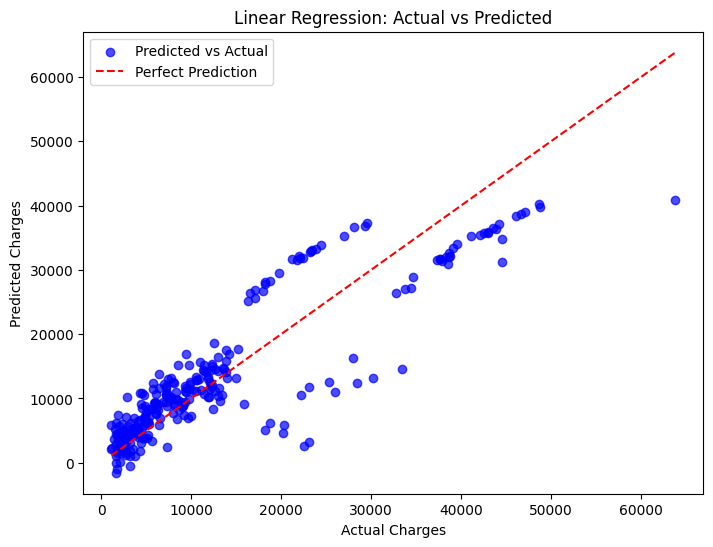

In [76]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test, y_predict, color='blue', alpha=0.7, label='Predicted vs Actual')
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()

## Ridge Regression
#### Applying Ridge Regression to reduce overfitting by penalizing large coefficients (L2 regularization)


In [34]:
ridge=Ridge(alpha=1.0)
ridge.fit(x_train_scaled,Y_train)

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


In [35]:
y_predict_ridge=ridge.predict(x_test_scaled)

#### Evaluating model performance using MAE, MSE, RMSE and R-squared score


In [37]:
mae_ridge=mean_absolute_error(Y_test,y_predict_ridge)
mse_ridge=mean_squared_error(Y_test,y_predict_ridge)
rmse_ridge=np.sqrt(mse)
r2_ridge=r2_score(Y_test,y_predict_ridge)

print("Mean Absolute Error in Ridge Regression:",mae_ridge)
print("Mean Squared Error in Ridge Regression:",mse_ridge)
print("Root Mean Squared Error in Ridge Regression:",rmse_ridge)
print("R2 Accuracy Score in Ridge Regression:",r2_ridge)

Mean Absolute Error in Ridge Regression: 4182.7965965832645
Mean Squared Error in Ridge Regression: 33604973.539963305
Root Mean Squared Error in Ridge Regression: 5796.284659276275
R2 Accuracy Score in Ridge Regression: 0.7835410749121386


In [38]:
ridge_coeff=pd.DataFrame(ridge.coef_,x.columns,columns=['Ridge Coefficient'])
ridge_coeff.sort_values(by='Ridge Coefficient',ascending=False)

,Ridge Coefficient
smoker_yes,9549.276683
age,3611.354521
bmi,2034.362351
children,516.761658
sex_male,-8.615975
region_northwest,-157.633519
region_southeast,-288.545534
region_southwest,-348.270354


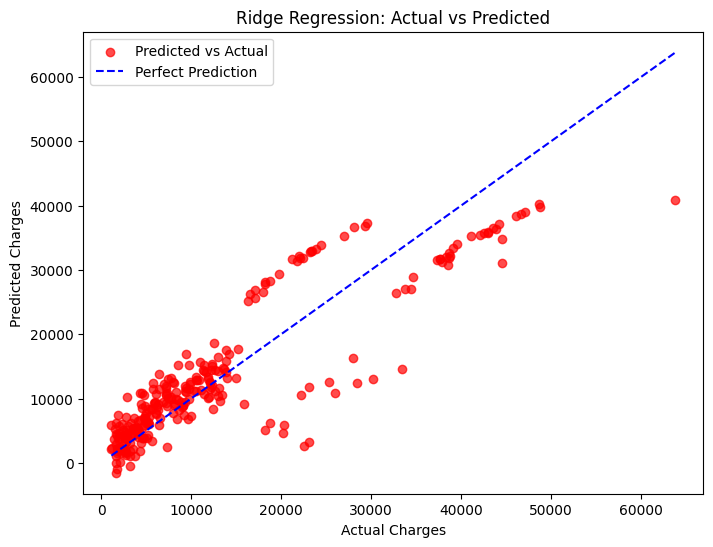

In [79]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test,y_predict_ridge,color='red',alpha=0.7,label='Predicted vs Actual')
plt.plot([Y_test.min(),Y_test.max()],
        [Y_test.min(),Y_test.max()],
        color='blue',linestyle='--',label='Perfect Prediction')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Ridge Regression: Actual vs Predicted")
plt.legend()
plt.show()

## Lasso Regression
#### Applying Lasso Regression for regularization and feature selection Lasso can shrink less important feature coefficients to zero


In [40]:
lasso=Lasso(alpha=0.01)
lasso.fit(x_train_scaled,Y_train)

,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",0.01
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


In [41]:
y_predict_lasso=lasso.predict(x_test_scaled)

#### Evaluating model performance using MAE, MSE, RMSE and R-squared score

In [42]:
mae_lasso=mean_absolute_error(Y_test,y_predict_lasso)
mse_lasso=mean_squared_error(Y_test,y_predict_lasso)
rmse_lasso=np.sqrt(mse_lasso)
r2_lasso=r2_score(Y_test,y_predict_lasso)

print("Mean Absolute Error in Lasso Regression:",mae_lasso)
print("Mean Squared Error in Lasso Regression:",mse_lasso)
print("Root Mean Squared Error in Lasso Regression:",rmse_lasso)
print("R2 Accuracy Score in Lasso Regression:",r2_lasso)

Mean Absolute Error in Lasso Regression: 4181.197631564924
Mean Squared Error in Lasso Regression: 33596958.01032431
Root Mean Squared Error in Lasso Regression: 5796.288295998078
R2 Accuracy Score in Lasso Regression: 0.7835927051545373


In [46]:
lasso_coeff = pd.DataFrame(
    lasso.coef_,
    x.columns,
    columns=['Lasso Coefficient']
)
lasso_coeff.sort_values(by='Lasso Coefficient', ascending=False)

,Lasso Coefficient
smoker_yes,9558.470436
age,3614.966712
bmi,2036.213246
children,516.880608
sex_male,-9.281790
region_northwest,-158.110462
region_southeast,-290.121768
region_southwest,-349.078665


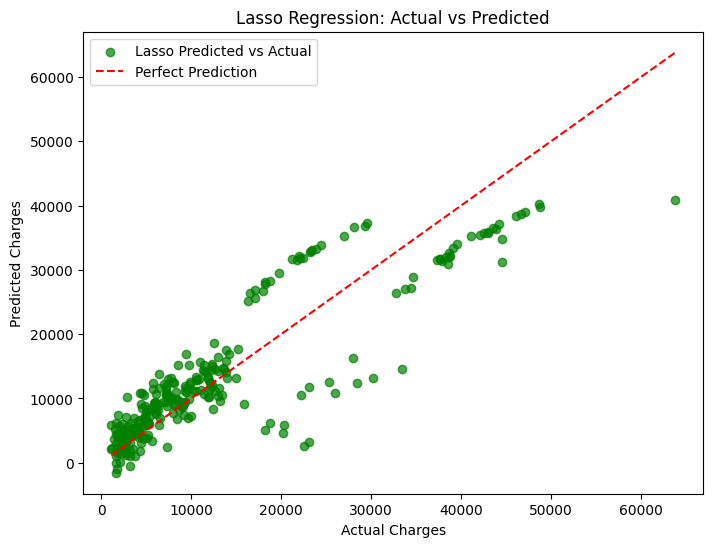

In [80]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test,y_predict_lasso,color='green',alpha=0.7,label='Lasso Predicted vs Actual')
plt.plot([Y_test.min(),Y_test.max()],
        [Y_test.min(),Y_test.max()],
        color='red',linestyle='--',label='Perfect Prediction')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Lasso Regression: Actual vs Predicted")
plt.legend()
plt.show()

#### Comparing coefficients of Linear, Ridge, and Lasso models to understand the effect of regularization

In [48]:
compare=pd.DataFrame({
    "Model":['Linear Regression','Ridge Regression','Lasso Regression'],
    "MAE":[mae,mae_ridge,mae_lasso],
    "MSE":[mse,mse_ridge,mse_lasso],
    "RMSE":[rmse,rmse_ridge,rmse_lasso],
    "R2 Score":[r2,r2_ridge,r2_lasso]
})

In [49]:
compare

,Model,MAE,MSE,RMSE,R2 Score
0,Linear Regression,4181.194474,3.359692e+07,5796.284659,0.783593
1,Ridge Regression,4182.796597,3.360497e+07,5796.284659,0.783541
2,Lasso Regression,4181.197632,3.359696e+07,5796.288296,0.783593


#### Calculating residuals (difference between actual and predicted values) to analyze model errors
#### Plotting residuals to check if errors are randomly distributed

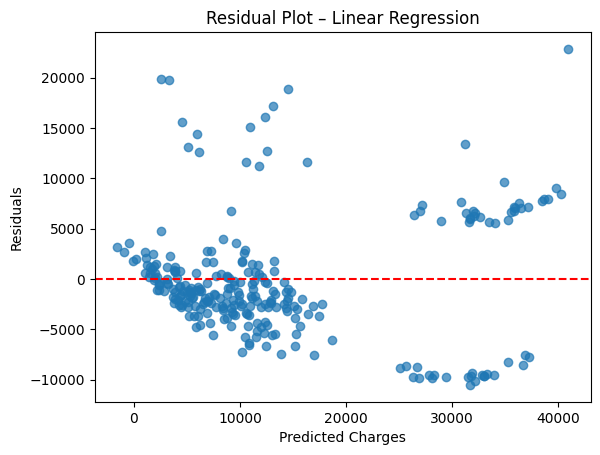

In [85]:
residuals = Y_test - y_predict
plt.figure()
plt.scatter(y_predict, residuals,alpha=0.7)
plt.axhline(y=0,color='red',linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot – Linear Regression")
plt.show()

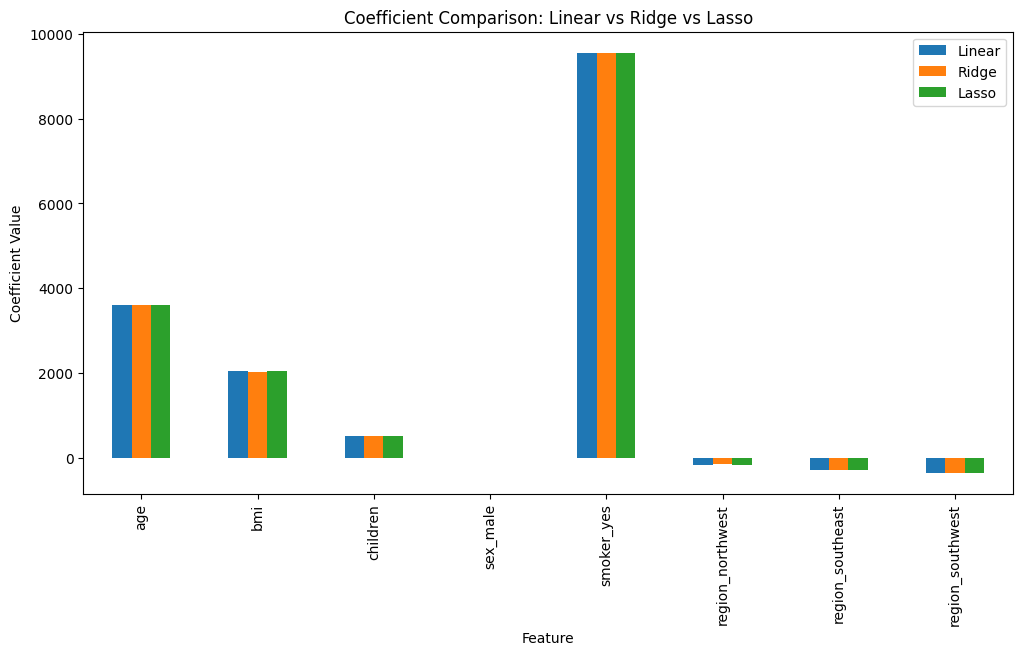

In [86]:
coef_df = pd.DataFrame({
    'Feature': x.columns,
    'Linear': lr.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_
})
coef_df.set_index('Feature').plot(kind='bar', figsize=(12,6))
plt.ylabel("Coefficient Value")
plt.title("Coefficient Comparison: Linear vs Ridge vs Lasso")
plt.show()